In [1]:
# import pandas and matplotlib
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# reading the dataset (.csv file)
maindf = pd.read_csv("./CSV_files/AirQualityIndia.csv",  encoding = "latin1")

C:\Users\arshi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# a sample of five random rows from the dataset
maindf.sample(n=5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
45440,603,20-04-15,Assam,Guwahati,Assam State Pollution Control Board,"Residential, Rural and other Areas",8.0,15.0,151.000000,NaN,"Boargaon, Dist- Kamrup,Guwahati",NaN,2015-04-20
425436,475,15-09-10,West Bengal,Kolkata,West Bengal State Pollution Control Board,"Residential, Rural and other Areas",4.6,35.0,22.666667,68.666667,"Minto Park, Kolkata",NaN,2010-09-15
254783,576,16-02-15,Maharashtra,Sangli,Maharashtra State Pollution Control Board,Industrial Area,24.0,73.0,71.000000,NaN,"Krishna Valley School, Sangli",NaN,2015-02-16
207635,NaN,21-08-07,Maharashtra,Aurangabad (MS),NaN,Sensitive Areas,NaN,NaN,NaN,NaN,Bibi-Ka-Maqbara,NaN,2007-08-21
261452,699,12-05-15,Meghalaya,Khliehriat,Meghalaya State Pollution Control Board,"Residential, Rural and other Areas",2.0,5.0,28.000000,NaN,"Office Premises of the O/o BDO, C & RD Block, ...",NaN,2015-05-12


In [4]:
# dimensions of the dataset
maindf.shape

(435742, 13)

In [5]:
# datatype of values in each column
maindf.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [6]:
# number of unique values in each column
for col in maindf.columns.tolist():
    print("{}: {}".format(col, maindf[col].unique().size))

stn_code: 804
sampling_date: 5486
state: 37
location: 305
agency: 65
type: 11
so2: 4198
no2: 6865
rspm: 6066
spm: 6669
location_monitoring_station: 992
pm2_5: 434
date: 5068


In [7]:
# unique values in each column and their corresponding number of occurances
for col in maindf.columns:
    print(col)
    print(maindf[col].value_counts(dropna=False))
    print("\n")

stn_code
NaN        144077
193.0        1428
519.0        1280
708.0        1273
541.0        1270
710.0        1269
SAMP         1187
132          1180
61.0         1148
106.0        1125
268          1112
263.0        1106
34           1098
711.0        1092
117          1074
76.0         1066
35           1043
596.0        1041
271          1004
339           994
118           990
301.0         954
302.0         943
264.0         929
335.0         922
322.0         902
17.0          883
464.0         856
29.0          835
131.0         830
            ...  
270.0           9
179.0           9
230.0           9
173.0           9
10002.0         9
244.0           8
20005.0         8
20001.0         8
798.0           7
175.0           7
211.0           6
261.0           6
141             6
30004.0         5
30003.0         5
30001.0         5
195.0           4
5.0             4
213.0           3
191.0           3
241.0           3
205.0           2
53.0            2
560.0           2
1

NaN        426428
 29.00        325
 30.00        325
 26.00        309
 31.00        297
 28.00        275
 32.00        270
 25.00        257
 34.00        239
 33.00        229
 27.00        226
 38.00        221
 35.00        206
 24.00        200
 36.00        199
 23.00        180
 21.00        180
 42.00        170
 22.00        163
 18.00        153
 13.00        146
 19.00        145
 12.00        145
 14.00        141
 17.00        141
 37.00        140
 39.00        138
 10.00        136
 40.00        132
 41.00        131
            ...  
 68.80          1
 237.00         1
 46.20          1
 37.70          1
 72.60          1
 13.20          1
 197.00         1
 395.00         1
 18.40          1
 36.70          1
 268.00         1
 30.12          1
 23.40          1
 24.70          1
 19.50          1
 29.40          1
 46.22          1
 41.30          1
 241.00         1
 41.63          1
 37.85          1
 200.00         1
 58.20          1
 54.57          1
 194.00   

In [8]:
maindf.drop(["stn_code", "agency", "type", "location_monitoring_station", "pm2_5"], axis=1, inplace=True)

In [9]:
# We find that the only rows where 'sampling_date' is not equal to 'date' are the ones which have no data recorded. So we drop 
# those rows and one of the columns out of 'sampling_date' and 'date'
maindf.loc[maindf["sampling_date"]!=maindf["sampling_date"]]

,sampling_date,state,location,so2,no2,rspm,spm,date
435739,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# dropping 'sampling_date' column because the date in that column is represented in different formats whereas it is not so in 
# the 'date' column.
maindf.drop("sampling_date", axis=1, inplace=True)

# rename the 'date' column as 'sampling_date'
maindf.rename(columns={"date":"sampling_date"}, inplace=True)

In [11]:
# checking the dimensions and column names after dropping and renaming the columns
print(maindf.shape)
maindf.columns.tolist()

(435742, 7)


['state', 'location', 'so2', 'no2', 'rspm', 'spm', 'sampling_date']

In [12]:
# the states for which no information is available have only one row dedicated to them. So we delete those row where the
# value_counts() function for that particular state returns 1.
for state in maindf["state"].unique().tolist():
    if(maindf["state"].value_counts()[state]==1):
        maindf.drop(maindf[maindf["state"]==state].index, inplace=True)

In [13]:
# print the number of states remaining in the dataset
len(maindf["state"].unique().tolist())

33

In [14]:
# delete all the rows where no information is available
maindf = maindf.drop(maindf[(maindf["so2"].isnull()) & (maindf["no2"].isnull()) &
                   (maindf["rspm"].isnull()) & (maindf["spm"].isnull())].index)

In [15]:
# coverting the datatype of 'sampling_date' from 'object' to 'datetime'
maindf["sampling_date"] = pd.to_datetime(maindf["sampling_date"], format="%Y/%m/%d")
print(maindf["sampling_date"].dtype)
print(maindf["sampling_date"].head())
print(maindf["sampling_date"].head().tolist())

datetime64[ns]
0   1990-02-01
1   1990-02-01
2   1990-02-01
3   1990-03-01
4   1990-03-01
Name: sampling_date, dtype: datetime64[ns]
[Timestamp('1990-02-01 00:00:00'), Timestamp('1990-02-01 00:00:00'), Timestamp('1990-02-01 00:00:00'), Timestamp('1990-03-01 00:00:00'), Timestamp('1990-03-01 00:00:00')]


In [16]:
# the last date of reporting
maindf["sampling_date"].max()

Timestamp('2015-12-31 00:00:00')

In [17]:
# the first date of reporting
maindf["sampling_date"].min()

Timestamp('1987-01-01 00:00:00')

In [18]:
# states and number of state which have data before 1990
print(maindf.loc[maindf["sampling_date"]<"1990-01-01"]["state"].unique())
print(maindf.loc[maindf["sampling_date"]<"1990-01-01"]["state"].unique().size)

['Bihar' 'Chandigarh' 'Daman & Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Uttar Pradesh'
 'West Bengal']
19


In [19]:
# states and number of state which have data between 1990 and 2000
print(maindf.loc[maindf["sampling_date"].between(left="1990-01-01", right="2000-01-01")]["state"].unique())
print(maindf.loc[maindf["sampling_date"].between(left="1990-01-01", right="2000-01-01")]["state"].unique().size)

['Andhra Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra'
 'Meghalaya' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Tamil Nadu'
 'Uttar Pradesh' 'West Bengal']
24


In [20]:
# states and number of state which have data between 2010 and 2015
print(maindf.loc[maindf["sampling_date"].between(left="2010-01-01", right="2015-01-01")]["state"].unique())
print(maindf.loc[maindf["sampling_date"].between(left="2010-01-01", right="2015-01-01")]["state"].unique().size)

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Mizoram'
 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Tamil Nadu'
 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
31


In [21]:
print(maindf.loc[maindf["sampling_date"]<"2016-01-01"]["state"].unique())
print(maindf.loc[maindf["sampling_date"]<"2016-01-01"]["state"].unique().size)

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan'
 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'Uttaranchal'
 'West Bengal']
33


In [22]:
# first and last date of reporting fo each state
for state in maindf["state"].unique().tolist():
    print(state + ": ")
    print(maindf[maindf["state"]==state]["sampling_date"].min())
    print(maindf[maindf["state"]==state]["sampling_date"].max())
    print("\n")

Andhra Pradesh: 
1990-02-01 00:00:00
2015-12-28 00:00:00


Arunachal Pradesh: 
2014-05-08 00:00:00
2015-12-22 00:00:00


Assam: 
1991-01-01 00:00:00
2015-12-31 00:00:00


Bihar: 
1987-01-12 00:00:00
2012-12-31 00:00:00


Chandigarh: 
1989-02-01 00:00:00
2015-12-31 00:00:00


Chhattisgarh: 
1993-10-01 00:00:00
2015-12-31 00:00:00


Dadra & Nagar Haveli: 
1992-06-01 00:00:00
2015-12-30 00:00:00


Daman & Diu: 
1989-01-01 00:00:00
2015-12-30 00:00:00


Delhi: 
1987-01-09 00:00:00
2015-12-31 00:00:00


Goa: 
1987-01-04 00:00:00
2015-12-31 00:00:00


Gujarat: 
1987-01-01 00:00:00
2015-12-31 00:00:00


Haryana: 
1987-01-06 00:00:00
2015-04-30 00:00:00


Himachal Pradesh: 
1987-01-09 00:00:00
2015-12-31 00:00:00


Jammu & Kashmir: 
2009-01-06 00:00:00
2015-12-31 00:00:00


Jharkhand: 
2004-01-09 00:00:00
2015-12-30 00:00:00


Karnataka: 
1987-01-04 00:00:00
2015-12-31 00:00:00


Kerala: 
1987-03-10 00:00:00
2015-12-31 00:00:00


Madhya Pradesh: 
1988-01-07 00:00:00
2015-12-31 00:00:00


Mahar

In [23]:
# create dataframe containing 
df1 = maindf.groupby(by=["state", "location", "sampling_date"])["state", "location", "sampling_date", "so2", "no2", "rspm", "spm"].mean()

In [24]:
df1.shape

(304832, 4)

In [25]:
df1.dtypes

so2     float64
no2     float64
rspm    float64
spm     float64
dtype: object

In [26]:
df1.sample(n=5)

,,,so2,no2,rspm,spm
state,location,sampling_date,,,,
Maharashtra,Chandrapur,2012-09-25,6.500000,10.000000,112.5,NaN
West Bengal,Raniganj,2011-08-24,27.666667,31.333333,54.0,NaN
Maharashtra,Jalgaon,2015-07-02,15.000000,44.000000,112.0,NaN
Bihar,Jamshedpur,1997-10-01,36.150000,41.400000,NaN,78.5
Karnataka,Gulbarga,2009-05-05,3.200000,16.800000,117.0,245.0


## Analyze data from 1990-2000

In [27]:
df2 = df1.groupby(by=["state", "sampling_date"])["so2", "no2", "rspm", "spm"].mean()

In [28]:
df2.head()

so2        no2  rspm         spm
state          sampling_date                                       
Andhra Pradesh 1990-02-01     4.700000  17.633333   NaN         NaN
               1990-03-01     5.800000  15.966667   NaN         NaN
               1990-04-01     4.766667  16.266667   NaN         NaN
               1990-05-01     3.800000  13.750000   NaN         NaN
               1990-06-01     4.266667  15.066667   NaN  108.666667

In [29]:
so2conc = df2.loc[(df2.index.get_level_values("sampling_date")>"1990") &
                  (df2.index.get_level_values("sampling_date")<"2000") &
                  (df2.index.get_level_values("state")=="Andhra Pradesh")]["so2"].tolist()

In [30]:
so2conc

[4.7,
 5.8,
 4.766666666666667,
 3.8,
 4.266666666666667,
 5.1000000000000005,
 6.8,
 19.73333333333333,
 16.233333333333334,
 15.800000000000002,
 20.133333333333333,
 21.2,
 5.833333333333333,
 13.133333333333333,
 11.633333333333335,
 3.1999999999999997,
 6.866666666666667,
 7.6000000000000005,
 8.633333333333333,
 9.0,
 13.800000000000002,
 8.700000000000001,
 32.65833333333333,
 21.933333333333334,
 48.975,
 30.326666666666668,
 15.791666666666666,
 7.091666666666667,
 26.016666666666666,
 7.2666666666666675,
 13.399999999999999,
 14.3,
 13.258333333333333,
 9.133333333333333,
 8.133333333333333,
 7.900000000000001,
 6.900000000000001,
 6.033333333333334,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 14.233333333333334,
 23.333333333333332,
 15.333333333333334,
 14.333333333333334,
 15.15,
 11.133333333333333,
 7.38,
 8.639999999999999,
 5.54,
 9.433333333333334,
 1.366666666666667,
 12.450000000000001,
 15.816666666666668,
 15.88,
 13.719999999999999,
 12.883333333333335,
 17.958333333333

In [31]:
dates = df2.loc[(df2.index.get_level_values("sampling_date")>"1990") &
                  (df2.index.get_level_values("sampling_date")<"2000") &
                  (df2.index.get_level_values("state")=="Andhra Pradesh")].index.get_level_values("sampling_date").date.tolist()

In [32]:
dates

[datetime.date(1990, 2, 1),
 datetime.date(1990, 3, 1),
 datetime.date(1990, 4, 1),
 datetime.date(1990, 5, 1),
 datetime.date(1990, 6, 1),
 datetime.date(1990, 7, 1),
 datetime.date(1990, 8, 1),
 datetime.date(1990, 9, 1),
 datetime.date(1990, 10, 1),
 datetime.date(1990, 11, 1),
 datetime.date(1991, 1, 1),
 datetime.date(1991, 2, 1),
 datetime.date(1991, 3, 1),
 datetime.date(1991, 4, 1),
 datetime.date(1991, 5, 1),
 datetime.date(1991, 6, 1),
 datetime.date(1991, 7, 1),
 datetime.date(1991, 8, 1),
 datetime.date(1991, 9, 1),
 datetime.date(1991, 10, 1),
 datetime.date(1991, 11, 1),
 datetime.date(1991, 12, 1),
 datetime.date(1992, 1, 1),
 datetime.date(1992, 2, 1),
 datetime.date(1992, 3, 1),
 datetime.date(1992, 4, 1),
 datetime.date(1992, 5, 1),
 datetime.date(1992, 6, 1),
 datetime.date(1992, 7, 1),
 datetime.date(1992, 8, 1),
 datetime.date(1992, 9, 1),
 datetime.date(1992, 10, 1),
 datetime.date(1992, 11, 1),
 datetime.date(1992, 12, 1),
 datetime.date(1993, 1, 1),
 datetime.da

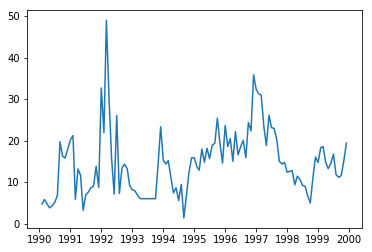

In [33]:
plt.plot(dates, so2conc)